<a href="https://colab.research.google.com/github/fbetulakyol/Coursera_Capstone/blob/master/Capstone_Project_The_Battle_of_the_Neighborhoods_(Week_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone Project - The Battle of the Neighborhoods (Week 2)
### Applied Data Science Capstone by IBM/Coursera

# Table of contents


*   [Introduction: Business Problem](#introduction)
*   [Data](#data)
*   [Methodology](#methods)
*   [Analysis](#analysis)
*   [Results and Discussion](#results)
*   [Conclusion](#conclusion)




# Introduction/Business Problem <a name="introduction"></a>

Ankara is the capital city of Turkey. It includes lots of universities and work places. Students and workers are the important customers of  restaurants. For this reason they search good places to eat or drink something. I will be work on recommending a place to stakeholders who wants open a restaurant in Ankara which is capital of Turkey. In addition to cafe venues, tourists who come to Ankara and searching a hotel for accommodation hotel venues were investigated. The project will be useful for entrepreneur who will open a new restaurant and someone who searchs a good restaurant or hotels in Ankara.


# Data <a name="data"></a>

In order to provide solution to the problem that Business Problem refers place data was needed.
Data sources and data format that are used in this project are:

*   Data which is accessible with using Foursquare API
*   Kızılay and Bahçelievler nearby venues data that is retrieved by using Foursquare API
*   Rating of each restaurant venue with radius 500 meters.



In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import *

In [2]:
import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans
#!conda install -c conda-forge folium=0.5.0 --yes
import folium

In [3]:
CLIENT_ID = 'HRLVLMF22OHM5APAVNZCUPO2SP2LBDUMIEQXROB0MMWLJCPP' # your Foursquare ID
CLIENT_SECRET = 'FSFUSGKFLMFF2ZBKWTFU1TWHRDNBABHAFXQUL00IXFGKQ0WB' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value
ACCESS_TOKEN = 'C32X24TRBRYRWIXHFDN25CVLFZ2ZOUCRJWWLT3FZZZH43HJA' # your FourSquare Access Token

# Methodology <a name="methods"></a>

In this project two famous venues of Ankara that are Kızılay and Bahçelievler are investigated. Categories of places that are in 500 radius meters are  founded and clustering operation is done according to these categories.

In the second step restaurant categories that are found in the step 1 is seperated from other categories and they visualized in the map.

In the third step cafe venues has been examined seperately. The rating value if exists was found and saved in a dataframe.

A folium map was created and cafe venues were shown in this map. In addition this, the rating values of each place was added to the map. Place that has highest rating value is shown with red marker and other places is shown with blue marker.

Lastly, hotel venues are investigated.Like cafe venues they are found and rating values of hotels are retrieved. A map is created to show hotel venues.The rating values of each place was added to the map. Place that has highest rating value is shown with red marker and other places is shown with blue marker.

Places that have high rating values have been recommend to the users.

In [4]:
def find_latlng(address):

  geolocator = Nominatim(user_agent="ny_explorer")
  location = geolocator.geocode(address)
  latitude = location.latitude
  longitude = location.longitude
  return latitude,longitude

In [ ]:
address = 'Bahçelievler, Ankara'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Ankara are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Ankara are 39.931113, 32.8199584.


In [6]:
places=['Bahçelievler, Ankara','Kızılay, Ankara']
results={}
radius = 500
hotels={}
for i in places:
  lat,lng=find_latlng(i)
  url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
      CLIENT_ID, 
      CLIENT_SECRET, 
      VERSION, 
      lat, 
      lng, 
      radius, 
      LIMIT)
  #url
  results[i] = requests.get(url).json()
  hotels[i]=getHotelVenues(lat,lng,places)


In [ ]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [ ]:
nearby_venues={}
for j in places:
  venues = json_normalize(results[j]['response']['groups'][0]['items'])
    
  #nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
  filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
  nearby_venues[j] =venues[['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']]
  print(nearby_venues)
  nearby_venues[j] =nearby_venues[j].loc[:, filtered_columns]

# filter the category for each row
  nearby_venues[j]['venue.categories'] =nearby_venues[j].apply(get_category_type, axis=1)

# clean columns
  nearby_venues[j].columns = [col.split(".")[-1] for col in nearby_venues[j].columns]

#nearby_venues.head()

{'Bahçelievler, Ankara':                        venue.name  ... venue.location.lng
0            Pawn Burger & Hotdog  ...          32.819582
1   Metin Usta Erzurum Cağ Kebabı  ...          32.819494
2         Ankara Atlı Spor Kulübü  ...          32.816215
3                    Piranha Cafe  ...          32.823565
4          Bosco caffè e tiramisù  ...          32.819529
..                            ...  ...                ...
61                    Çocuk Parkı  ...          32.821889
62                      Three Man  ...          32.818210
63        Başkent Voleybol Salonu  ...          32.818469
64     Ankara Alacarta Restaurant  ...          32.818975
65                    Pony Kulübü  ...          32.815292

[66 rows x 4 columns]}
{'Bahçelievler, Ankara':                              name          categories        lat        lng
0            Pawn Burger & Hotdog        Burger Joint  39.928833  32.819582
1   Metin Usta Erzurum Cağ Kebabı    Kebab Restaurant  39.929157  32.819494
2 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
nearby_venues['Kızılay, Ankara'].head()

,name,categories,lat,lng
0,Dost Kitabevi,Bookstore,39.919727,32.855377
1,Tripod Foto,Camera Store,39.920695,32.851861
2,Yapı Kredi Yayınları,Bookstore,39.921322,32.854022
3,GSStore,Sporting Goods Shop,39.921364,32.853649
4,Kalem Kitap Kültür Sanat,Bookstore,39.920384,32.851633


### Unique categories that placed near to the specified location.

In [ ]:
print(nearby_venues['Bahçelievler, Ankara']['categories'].unique())

['Burger Joint' 'Kebab Restaurant' 'Sports Club' 'Café' 'Coffee Shop'
 'Wings Joint' 'Electronics Store' 'Middle Eastern Restaurant'
 'American Restaurant' 'Bakery' 'Rental Car Location' 'Hotel' 'Steakhouse'
 'Seafood Restaurant' 'Tennis Court' 'Pool' 'Hostel' 'Diner' 'Garden'
 'Turkish Home Cooking Restaurant' 'Turkish Restaurant' 'Track'
 'Soccer Field' 'Cigkofte Place' 'Sporting Goods Shop' 'Grocery Store'
 'Bagel Shop' 'Food Court' 'Arcade' 'Park' 'Boarding House'
 'Hardware Store' 'Breakfast Spot' 'Playground' 'Asian Restaurant'
 'Stadium' 'Restaurant' 'Athletics & Sports']


# Neighborhood search 

In [ ]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        #res= results["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [ ]:
ankara_venues={}
for place in places:
  ankara_venues[place]=getNearbyVenues(names=nearby_venues[place]['name'],
                               latitudes=nearby_venues[place]['lat'],
                               longitudes=nearby_venues[place]['lng']
                                  )

In [ ]:

ankara_venues['Bahçelievler, Ankara'].head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Pawn Burger & Hotdog,39.928833,32.819582,Pawn Burger & Hotdog,39.928833,32.819582,Burger Joint
1,Pawn Burger & Hotdog,39.928833,32.819582,AnkaCity,39.927611,32.821963,Hotel
2,Pawn Burger & Hotdog,39.928833,32.819582,Bosco caffè e tiramisù,39.928545,32.819529,Coffee Shop
3,Pawn Burger & Hotdog,39.928833,32.819582,Metin Usta Erzurum Cağ Kebabı,39.929157,32.819494,Kebab Restaurant
4,Pawn Burger & Hotdog,39.928833,32.819582,Green Oto Kiralama,39.928313,32.819485,Rental Car Location


In [ ]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_27860526a607458e80701688c420d9b4 = 'https://s3.eu-geo.objectstorage.softlayer.net'
else:
    endpoint_27860526a607458e80701688c420d9b4 = 'https://s3.eu-geo.objectstorage.service.networklayer.com'

client_27860526a607458e80701688c420d9b4 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='n37m4mrfR42NVKu8CIitFoow0y4_86Ruxoh06Md8nyz1',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_27860526a607458e80701688c420d9b4)

body = client_27860526a607458e80701688c420d9b4.get_object(Bucket='capstone-donotdelete-pr-zftmmpw0p0fgyl',Key='Venue_withrating.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_ankara = pd.read_csv(body)
df_ankara.drop(['postalCode', 'cc','city','state','country','crossStreet','formattedAddress'], axis=1)
df_ankara.head()

,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,neighborhood,city,state,country,formattedAddress,crossStreet,id,venue_rating
0,Ezgi Cafe,Café,Konur Sk. No:14/A Kızılay,39.918373,32.855767,"[{'label': 'display', 'lat': 39.91837283124024...",306,6420.0,TR,Çankaya,Ankara,Ankara,Türkiye,"['Konur Sk. No:14/A Kızılay', '06420 Ankara']",NaN,4c7556dbb474a1cdacf9b8bf,6.3
1,Moda Cafe&Bistro,Café,"Meşrutiyet, Atatürk Blv No:95, 06420 Kızılay A...",39.920423,32.854619,"[{'label': 'display', 'lat': 39.92042269097689...",64,6420.0,TR,Çankaya,Ankara,Ankara,Türkiye,"['Meşrutiyet, Atatürk Blv No:95, 06420 Kızılay...",Atatürk Caddesi,583ea7808f0be457d3b9e5a1,7.6
2,Flz Cafe & Restaurant,Café,GMK Blv. YKM Mağazası 8. Kat Kızılay,39.920764,32.852817,"[{'label': 'display', 'lat': 39.92076443347085...",104,6650.0,TR,Kızılay,Ankara,Ankara,Türkiye,['GMK Blv. YKM Mağazası 8. Kat Kızılay (Gazi M...,Gazi Mustafa Kemal Blv.,4c6278d4e1621b8dea792353,7.2
3,Su Cafe,Café,Konur Sk. No:6 Kızılay,39.918823,32.856081,"[{'label': 'display', 'lat': 39.91882288025211...",279,6420.0,TR,Çankaya,Ankara,Ankara,Türkiye,"['Konur Sk. No:6 Kızılay (Meşrutiyet Cad.)', '...",Meşrutiyet Cad.,4c38b73918e72d7fd5d818f5,6.1
4,Turuncu Cafe Pub,Pub,Meşrutiyet Cd. Konur 1 Sk. No:15/3 Kızılay,39.918450,32.856347,"[{'label': 'display', 'lat': 39.91844982632325...",326,6660.0,TR,NaN,Ankara,Ankara,Türkiye,['Meşrutiyet Cd. Konur 1 Sk. No:15/3 Kızılay (...,Karanfil Sokak,4ebaa2268b818968846e8bea,7.2


# Data Analysis <a name="analysis"></a>

### In this section, each category that place in the dataframe is counted and a bar plot is created. According to the bar plot venues that are located in the search place are most commonly belongs the cafe category. Second most common category is bookstore.

<Figure size 2160x2160 with 0 Axes>

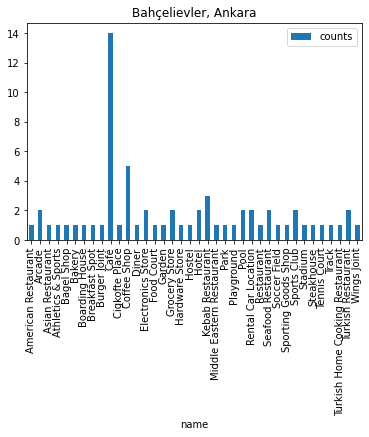

<Figure size 2160x2160 with 0 Axes>

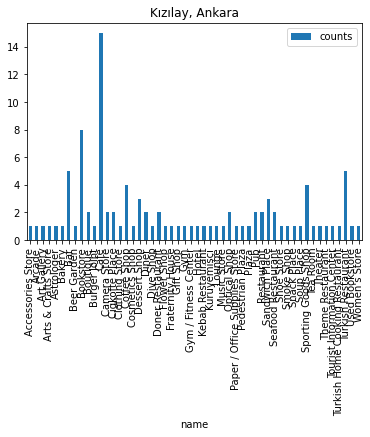

In [ ]:
import matplotlib.pyplot as plt

counts={}
for place in places:
  c=nearby_venues[place].groupby(by=['categories'])['name'].count()
  for i in range(len(c)):
    counts[i]={'name':c.keys()[i],'counts':c[c.keys()[i]]}
  df = pd.DataFrame.from_dict(counts, orient="index").reset_index()

  plt.figure(figsize=(30,30))
 
  df.plot(kind='bar',x='name', y='counts',title=place)

### Restaurant places in Ankara.

In [ ]:
restaurants={}
rests={}


for j in places:
  
  for i in range(len(ankara_venues[j])):
    if ankara_venues[j]['Venue Category'][i]=='Restaurant' or ankara_venues[j]['Venue Category'][i]=='Turkish Home Cooking Restaurant' or ankara_venues[j]['Venue Category'][i]=='Doner Restaurant' or ankara_venues[j]['Venue Category'][i]=='Kebab Restaurant':
  
      restaurants[i]={'Venue':ankara_venues[j]['Venue'][i],'Neighborhood':ankara_venues[j]['Neighborhood'][i],'Lat':ankara_venues[j]['Venue Latitude'][i],'Lng':ankara_venues[j]['Venue Longitude'][i],'Category':ankara_venues[j]['Venue Category'][i]}
  rests[j]=restaurants
  
ankara_restaurants_bevler=pd.DataFrame.from_dict(rests['Bahçelievler, Ankara'], orient="index").reset_index()
ankara_restaurants_bevler.sort_values("Venue", inplace = True)
ankara_restaurants_bevler.drop_duplicates(subset='Lat', keep='first',inplace=True)
ankara_restaurants_kızılay=pd.DataFrame.from_dict(rests['Kızılay, Ankara'], orient="index").reset_index()
ankara_restaurants_kızılay.sort_values("Venue", inplace = True)
ankara_restaurants_kızılay.drop_duplicates(subset='Lat', keep='first',inplace=True)
  #print(ankara_restaurants.head())
#
'''
print(ankara_restaurants.shape)
ankara_restaurants.sort_values("Venue", inplace = True)
ankara_restaurants.drop_duplicates(subset='Lat', keep='first',inplace=True)
print(ankara_restaurants.shape)
ankara_restaurants.head()
'''

'\nprint(ankara_restaurants.shape)\nankara_restaurants.sort_values("Venue", inplace = True)\nankara_restaurants.drop_duplicates(subset=\'Lat\', keep=\'first\',inplace=True)\nprint(ankara_restaurants.shape)\nankara_restaurants.head()\n'

In [ ]:
ankara_restaurants_bevler.head()

,index,Venue,Neighborhood,Lat,Lng,Category
48,730,Adana Kebapçısı Mekan 01,Green Oto Kiralama,39.924660,32.822793,Kebab Restaurant
135,1943,Ala Restaurant ve Spor Tesisi,Ankara Atlı Spor Aktiviteleri Binicilik Okulu,39.930071,32.813379,Restaurant
258,3713,Ankara Alacarta Restaurant,Ankara Alacarta Restaurant,39.934460,32.818975,Restaurant
553,5459,Ankara Roof,Deniz Erin Astroloji ve Danışmanlık Merkezi,39.918945,32.854470,Restaurant
575,5826,Ata Aspava,Kafe Karanfil,39.918694,32.855251,Restaurant


In [ ]:
visual_map=visualize(ankara_restaurants_bevler)
visual_map

### Visualization of restaurants in the map.

In [ ]:
ankara_restaurants.head()

,index,Neighborhood,Venue,Lat,Lng,Category
48,730,Green Oto Kiralama,Adana Kebapçısı Mekan 01,39.924660,32.822793,Kebab Restaurant
135,1943,Ankara Atlı Spor Aktiviteleri Binicilik Okulu,Ala Restaurant ve Spor Tesisi,39.930071,32.813379,Restaurant
258,3713,Ankara Alacarta Restaurant,Ankara Alacarta Restaurant,39.934460,32.818975,Restaurant
553,5459,Deniz Erin Astroloji ve Danışmanlık Merkezi,Ankara Roof,39.918945,32.854470,Restaurant
575,5826,Kafe Karanfil,Ata Aspava,39.918694,32.855251,Restaurant


In [ ]:


def visualize(rests):
  map_restaurant = folium.Map(location=[latitude, longitude], zoom_start=10)
  for lat, lng, name,catg in zip(rests['Lat'], rests['Lng'], rests['Venue'],rests['Category']):
    label = '{},{}'.format(name,catg)
    label = folium.Popup(label, parse_html=True)
    
    
    folium.CircleMarker(
                [lat, lng],
                radius=5,
                popup=label,
                color='red',
                fill=True,
                fill_color='#3186cc',
                fill_opacity=0.7,
                parse_html=False).add_to(map_restaurant)
  return map_restaurant

In [ ]:
ankara_onehot = pd.get_dummies(ankara_restaurants[['Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
ankara_onehot['Venue'] = ankara_restaurants['Venue'] 

# move neighborhood column to the first column
fixed_columns = [ankara_onehot.columns[-1]] + list(ankara_onehot.columns[:-1])
ankara_onehot = ankara_onehot[fixed_columns]

ankara_onehot.head()

,Venue,Doner Restaurant,Kebab Restaurant,Restaurant,Turkish Home Cooking Restaurant
558,Ankara Roof,0,0,1,0
487,Ata Aspava,0,0,1,0
280,Cici Piknik,1,0,0,0
517,Ciğerim Ahmet Usta,0,1,0,0
299,Deva Kebap ve İşkembecisi,0,0,0,1


In [ ]:
ankara_grouped = ankara_onehot.groupby('Venue').mean().reset_index()
ankara_grouped

,Venue,Doner Restaurant,Kebab Restaurant,Restaurant,Turkish Home Cooking Restaurant
0,Ankara Roof,0,0,1,0
1,Ata Aspava,0,0,1,0
2,Cici Piknik,1,0,0,0
3,Ciğerim Ahmet Usta,0,1,0,0
4,Deva Kebap ve İşkembecisi,0,0,0,1
5,Hoş MeMo Kebapçısı,0,1,0,0
6,Jeoloji Mühendisleri Odası Sosyal Tesisler,0,0,1,0
7,Kebo,1,0,0,0
8,Masabaşı Kebapçısı,0,1,0,0
9,Mersinli Ali Usta Tantuni&Dürüm,0,1,0,0


In [ ]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [ ]:
num_top_venues = 4

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = ankara_grouped['Venue']

for ind in np.arange(ankara_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(ankara_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue
0,Ankara Roof,Restaurant,Turkish Home Cooking Restaurant,Kebab Restaurant,Doner Restaurant
1,Ata Aspava,Restaurant,Turkish Home Cooking Restaurant,Kebab Restaurant,Doner Restaurant
2,Cici Piknik,Doner Restaurant,Turkish Home Cooking Restaurant,Restaurant,Kebab Restaurant
3,Ciğerim Ahmet Usta,Kebab Restaurant,Turkish Home Cooking Restaurant,Restaurant,Doner Restaurant
4,Deva Kebap ve İşkembecisi,Turkish Home Cooking Restaurant,Restaurant,Kebab Restaurant,Doner Restaurant


In [ ]:
kclusters = 5

ankara_grouped_clustering = ankara_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(ankara_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  


array([0, 2, 1, 2, 1, 1, 0, 0, 2, 3], dtype=int32)

In [ ]:
# set number of clusters
kclusters = 3

ankara_grouped_clustering = ankara_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(ankara_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 1, 2, 2, 1, 1, 2, 2, 2, 2], dtype=int32)

In [ ]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

ankara_merged = ankara_restaurants

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
ankara_merged =ankara_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

ankara_merged.head()

,index,Neighborhood,Venue,Lat,Lng,Category,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue
558,9995,Baskent Piknik,Ankara Roof,39.918945,32.854470,Restaurant,1,Restaurant,Turkish Home Cooking Restaurant,Kebab Restaurant,Doner Restaurant
487,8632,Big Baker,Ata Aspava,39.918694,32.855251,Restaurant,1,Restaurant,Turkish Home Cooking Restaurant,Kebab Restaurant,Doner Restaurant
280,5078,Ankara Roof,Cici Piknik,39.919718,32.851116,Doner Restaurant,2,Doner Restaurant,Turkish Home Cooking Restaurant,Restaurant,Kebab Restaurant
517,9253,KlipsConcept,Ciğerim Ahmet Usta,39.920063,32.858540,Kebab Restaurant,0,Kebab Restaurant,Turkish Home Cooking Restaurant,Restaurant,Doner Restaurant
299,5382,Kebo,Deva Kebap ve İşkembecisi,39.921706,32.856245,Turkish Home Cooking Restaurant,3,Turkish Home Cooking Restaurant,Restaurant,Kebab Restaurant,Doner Restaurant


In [ ]:
ankara_merged.loc[ankara_merged['Cluster Labels'] == 0, ankara_merged.columns[[1] + list(range(5,ankara_merged.shape[1]))]]

,Neighborhood,Category,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue
517,KlipsConcept,Kebab Restaurant,0,Kebab Restaurant,Turkish Home Cooking Restaurant,Restaurant,Doner Restaurant
501,Subway,Kebab Restaurant,0,Kebab Restaurant,Turkish Home Cooking Restaurant,Restaurant,Doner Restaurant
410,Meşeli Restoran,Kebab Restaurant,0,Kebab Restaurant,Turkish Home Cooking Restaurant,Restaurant,Doner Restaurant
6,Dost Kitabevi,Kebab Restaurant,0,Kebab Restaurant,Turkish Home Cooking Restaurant,Restaurant,Doner Restaurant
548,Anadolu Kulübü,Kebab Restaurant,0,Kebab Restaurant,Turkish Home Cooking Restaurant,Restaurant,Doner Restaurant
252,Can Balık,Kebab Restaurant,0,Kebab Restaurant,Turkish Home Cooking Restaurant,Restaurant,Doner Restaurant


# Visualization of venues in the map.

In [ ]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(ankara_merged['Lat'], ankara_merged['Lng'], ankara_merged['Neighborhood'], ankara_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# Finding Cafe places in Ankara


In [ ]:
search_query = 'cafe'
radius = 500
print(search_query + ' .... OK!')

cafe .... OK!


In [ ]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=HRLVLMF22OHM5APAVNZCUPO2SP2LBDUMIEQXROB0MMWLJCPP&client_secret=FSFUSGKFLMFF2ZBKWTFU1TWHRDNBABHAFXQUL00IXFGKQ0WB&ll=39.931113,32.8199584&oauth_token=C32X24TRBRYRWIXHFDN25CVLFZ2ZOUCRJWWLT3FZZZH43HJA&v=20180605&query=cafe&radius=500&limit=100'

In [ ]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '607feda0ce7b0968dad32c91'},
 'notifications': [{'type': 'notificationTray', 'item': {'unreadCount': 0}}],
 'response': {'venues': [{'id': '59d48c474f0e582b69d80ee8',
    'name': 'Bizim Cafe&Kahvaltı',
    'location': {'address': 'Bişkek Caddesi No:17',
     'lat': 39.929435360124764,
     'lng': 32.81967517740243,
     'labeledLatLngs': [{'label': 'display',
       'lat': 39.929435360124764,
       'lng': 32.81967517740243}],
     'distance': 188,
     'postalCode': '06320',
     'cc': 'TR',
     'city': 'Ankara',
     'state': 'Ankara',
     'country': 'Türkiye',
     'formattedAddress': ['Bişkek Caddesi No:17', '06320 Ankara']},
    'categories': [{'id': '4bf58dd8d48988d143941735',
      'name': 'Breakfast Spot',
      'pluralName': 'Breakfast Spots',
      'shortName': 'Breakfast',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/breakfast_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1618996640',

In [ ]:
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:4: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,location.crossStreet,location.neighborhood,venuePage.id
0,59d48c474f0e582b69d80ee8,Bizim Cafe&Kahvaltı,"[{'id': '4bf58dd8d48988d143941735', 'name': 'B...",v-1618996640,False,Bişkek Caddesi No:17,39.929435,32.819675,"[{'label': 'display', 'lat': 39.92943536012476...",188,06320,TR,Ankara,Ankara,Türkiye,"[Bişkek Caddesi No:17, 06320 Ankara]",NaN,NaN,NaN
1,54df7f34498e0e161e80dc1a,Café Lizbon,"[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",v-1618996640,False,Gazi Üniversitesi Tıp Fakültesi Hastanesi Zemi...,39.933724,32.822836,"[{'label': 'display', 'lat': 39.93372442455786...",380,NaN,TR,Ankara,Ankara,Türkiye,[Gazi Üniversitesi Tıp Fakültesi Hastanesi Zem...,NaN,NaN,NaN
2,4f367974e4b0d9574becc633,Doğa Cafe,"[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",v-1618996640,False,Meriç Sokak 2/B BEŞTEPE,39.929659,32.816867,"[{'label': 'display', 'lat': 39.92965921135479...",309,06510,TR,Ankara,Ankara,Türkiye,"[Meriç Sokak 2/B BEŞTEPE (mevlâna bulvarı), 06...",mevlâna bulvarı,Çankaya,NaN
3,4f59dedee4b081a30f04ebf3,Piranha Cafe,"[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",v-1618996640,False,"Bahçelievler Mh.eski 53 sokak.. Yeni , 43. Sk...",39.930373,32.823565,"[{'label': 'display', 'lat': 39.93037301082143...",318,34180,TR,Ankara,Ankara,Türkiye,"[Bahçelievler Mh.eski 53 sokak.. Yeni , 43. S...",3 cadde,NaN,128218969
4,53fe1c51498e4f91f39c45c7,Seyir Cafe,"[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",v-1618996640,False,Prof Dr Muammer Aksoy Cad No 2,39.932492,32.826190,"[{'label': 'display', 'lat': 39.93249213008535...",553,06500,TR,Ankara,Ankara,Türkiye,[Prof Dr Muammer Aksoy Cad No 2 (Bahriye Üçok ...,Bahriye Üçok Caddesi,NaN,94244635


## Dataframe creation that consist of names, categories and adress of cafe venues in ankara.

In [ ]:
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,crossStreet,neighborhood,id
0,Bizim Cafe&Kahvaltı,Breakfast Spot,Bişkek Caddesi No:17,39.929435,32.819675,"[{'label': 'display', 'lat': 39.92943536012476...",188,06320,TR,Ankara,Ankara,Türkiye,"[Bişkek Caddesi No:17, 06320 Ankara]",NaN,NaN,59d48c474f0e582b69d80ee8
1,Café Lizbon,Café,Gazi Üniversitesi Tıp Fakültesi Hastanesi Zemi...,39.933724,32.822836,"[{'label': 'display', 'lat': 39.93372442455786...",380,NaN,TR,Ankara,Ankara,Türkiye,[Gazi Üniversitesi Tıp Fakültesi Hastanesi Zem...,NaN,NaN,54df7f34498e0e161e80dc1a
2,Doğa Cafe,Café,Meriç Sokak 2/B BEŞTEPE,39.929659,32.816867,"[{'label': 'display', 'lat': 39.92965921135479...",309,06510,TR,Ankara,Ankara,Türkiye,"[Meriç Sokak 2/B BEŞTEPE (mevlâna bulvarı), 06...",mevlâna bulvarı,Çankaya,4f367974e4b0d9574becc633
3,Piranha Cafe,Café,"Bahçelievler Mh.eski 53 sokak.. Yeni , 43. Sk...",39.930373,32.823565,"[{'label': 'display', 'lat': 39.93037301082143...",318,34180,TR,Ankara,Ankara,Türkiye,"[Bahçelievler Mh.eski 53 sokak.. Yeni , 43. S...",3 cadde,NaN,4f59dedee4b081a30f04ebf3
4,Seyir Cafe,Café,Prof Dr Muammer Aksoy Cad No 2,39.932492,32.826190,"[{'label': 'display', 'lat': 39.93249213008535...",553,06500,TR,Ankara,Ankara,Türkiye,[Prof Dr Muammer Aksoy Cad No 2 (Bahriye Üçok ...,Bahriye Üçok Caddesi,NaN,53fe1c51498e4f91f39c45c7
5,Yeşilbahçe Cafe,Café,NaN,39.932215,32.820580,"[{'label': 'display', 'lat': 39.93221505031239...",133,NaN,TR,NaN,NaN,Türkiye,NaN,NaN,NaN,4ff9d1fce4b002d4d48702e6
6,Keyif Cafe Restaurant,Turkish Restaurant,NaN,39.928600,32.822127,"[{'label': 'display', 'lat': 39.92859978050732...",335,NaN,TR,NaN,NaN,Türkiye,NaN,NaN,NaN,50001166e4b053d346f3417c
7,Oxy İnternet Cafe,Internet Cafe,NaN,39.931746,32.823475,"[{'label': 'display', 'lat': 39.93174616368626...",308,NaN,TR,NaN,NaN,Türkiye,NaN,NaN,NaN,5169d66c498ec7d17ed6de4e
8,Cadde Cafe,Café,Beşevler,39.932469,32.824936,"[{'label': 'display', 'lat': 39.93246878470710...",450,NaN,TR,Ankara,Ankara,Türkiye,"[Beşevler, Ankara]",NaN,NaN,4bfc018e57cd9c744270cc2b
9,Tadım Simit Cafe & Fastfood,Fast Food Restaurant,NaN,39.927041,32.818775,"[{'label': 'display', 'lat': 39.92704050333263...",464,NaN,TR,NaN,NaN,Türkiye,NaN,NaN,NaN,4fd2dc1de4b05a4aba1db787


### In this code snippet rating values if exist is found and saved to created dataframe.

In [ ]:
ratings={}
for i in range(len(dataframe_filtered)):
    venue_id=dataframe_filtered['id'][i]
    url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&oauth_token={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET,ACCESS_TOKEN, VERSION)

    result = requests.get(url).json()
    try:
        rating=result['response']['venue']['rating']
        ratings[i]={'id':dataframe_filtered['id'][i],'rating':rating}
    except:
        print('This venue has not been rated yet.')
    

This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not b

### A dictionary whose name is rating_list is created and rating values are taken. If location has no rating value it saved as 'NaN'.

In [ ]:
rating_list={}
k=0
for i in range(len(dataframe_filtered)):
    
    
   
        if i in ratings:
            
                
                rating_list[i]={'rating':ratings[i]['rating']}
                k+=1
                #break
                #r=ratings[j]['rating']
            
        else:
            
             
             
            rating_list[i]={'rating':'NaN'}
            k+=1
    
 

In [ ]:

body = client_27860526a607458e80701688c420d9b4.get_object(Bucket='capstone-donotdelete-pr-zftmmpw0p0fgyl',Key='Venue_withrating_Bahcelievler.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

dfbahcelievler= pd.read_csv(body)
dfbahcelievler.head()


,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,crossStreet,neighborhood,id,venue_rating
0,Bizim Cafe&Kahvaltı,Breakfast Spot,Bişkek Caddesi No:17,39.929435,32.819675,"[{'label': 'display', 'lat': 39.92943536012476...",188,6320.0,TR,Ankara,Ankara,Türkiye,"['Bişkek Caddesi No:17', '06320 Ankara']",NaN,NaN,59d48c474f0e582b69d80ee8,NaN
1,Café Lizbon,Café,Gazi Üniversitesi Tıp Fakültesi Hastanesi Zemi...,39.933724,32.822836,"[{'label': 'display', 'lat': 39.93372442455786...",380,NaN,TR,Ankara,Ankara,Türkiye,['Gazi Üniversitesi Tıp Fakültesi Hastanesi Ze...,NaN,NaN,54df7f34498e0e161e80dc1a,7.1
2,Doğa Cafe,Café,Meriç Sokak 2/B BEŞTEPE,39.929659,32.816867,"[{'label': 'display', 'lat': 39.92965921135479...",309,6510.0,TR,Ankara,Ankara,Türkiye,"['Meriç Sokak 2/B BEŞTEPE (mevlâna bulvarı)', ...",mevlâna bulvarı,Çankaya,4f367974e4b0d9574becc633,7.7
3,Piranha Cafe,Café,"Bahçelievler Mh.eski 53 sokak.. Yeni , 43. Sk...",39.930373,32.823565,"[{'label': 'display', 'lat': 39.93037301082143...",318,34180.0,TR,Ankara,Ankara,Türkiye,"['Bahçelievler Mh.eski 53 sokak.. Yeni , 43. ...",3 cadde,NaN,4f59dedee4b081a30f04ebf3,8.6
4,Seyir Cafe,Café,Prof Dr Muammer Aksoy Cad No 2,39.932492,32.826190,"[{'label': 'display', 'lat': 39.93249213008535...",553,6500.0,TR,Ankara,Ankara,Türkiye,['Prof Dr Muammer Aksoy Cad No 2 (Bahriye Üçok...,Bahriye Üçok Caddesi,NaN,53fe1c51498e4f91f39c45c7,6.8


In [ ]:
l=[]
for i in range(len(rating_list)):
    l.append(rating_list[i]['rating'])
dataframe_filtered['venue_rating']=l

In [ ]:
from project_lib import Project
project = Project(project_id='74468dcd-e25a-414a-b9fa-a4d1f254fe64',project_access_token='p-ed1c1f7f0d62573423595e9ab738f08f1d15c349')

In [ ]:
project.save_data(data=dataframe_filtered.to_csv(index=False),file_name='Venue_withrating_Bahcelievler.csv',overwrite=True)

{'file_name': 'Venue_withrating_Bahcelievler.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'capstone-donotdelete-pr-zftmmpw0p0fgyl',
 'asset_id': '4ab112fc-94b7-4c29-aea9-9c5ad63d7edf'}

In [ ]:
dataframe_filtered.groupby(['venue_rating']).apply (lambda x: x.sort_values (["name"])) 

name  \
venue_rating                                                
5.1          45                                Fiero Cafe   
             9                Tadım Simit Cafe & Fastfood   
5.5          46                         Çınar Cafe Bistro   
5.8          11                            My Garden Cafe   
5.9          35                               Leyman Cafe   
6.6          12                  Maraton Playstation Cafe   
6.7          23                          Gupse Firin&Cafe   
6.8          4                                 Seyir Cafe   
6.9          26                             Cafe Panorama   
7.1          1                                Café Lizbon   
             34                                 Füme Cafe   
7.6          16                          Park piknik cafe   
7.7          2                                  Doğa Cafe   
             18                           Sungur Bey Cafe   
8.2          25                           Antisosyal Cafe   
8.6          3                               Piranha Cafe   
NaN          10                             ACADEMIE CAFE   
             15                           Angelo Cafe Bar   
             48  Başkent Öğretmenevi Panorama Cafe B Katı   
             0                        Bizim Cafe&Kahvaltı   
             24                            Black Sea Cafe   
             14                        Botanik Cafe&Pasta   
             17                        Botanik Cafe&Pasta   
             8                                 Cadde Cafe   
             44                                   Cafe 35   
             37                              Cafe Canteen   
             31                                  Cafe Dem   
             30                                  Cafe Med   
             33                               Cafe Sentez   
             39                                  Cafe Tıp   
             28                                  Cafe Tıp   
             13                              Fenomen Cafe   
             27                      Keyfimce Cafe&Bistro   
             6                      Keyif Cafe Restaurant   
             43                       Küllük Cafe And Pub   
             42          MARRYYO Plastation (Cafe&bistro)   
             36                              MayaGöz Cafe   
             47                              Nihan's Cafe   
             7                          Oxy İnternet Cafe   
             22                             Paradise Cafe   
             29                        Piranha Cafe Bahçe   
             40                           Tbt Cafe Lounge   
             21                            Tea House Cafe   
             41                         TÖZAL Presto Cafe   
             38                               Türkay Cafe   
             32                             Vitamini Cafe   
             5                            Yeşilbahçe Cafe   
             49                             Zeytinli Cafe   
             19                             panaroma cafe   
             20                         tobb etü cafe mio   

                           categories  \
venue_rating                            
5.1          45                  Café   
             9   Fast Food Restaurant   
5.5          46                  Café   
5.8          11            Hookah Bar   
5.9          35                  Café   
6.6          12                Arcade   
6.7          23            Food Court   
6.8          4                   Café   
6.9          26                  Café   
7.1          1                   Café   
             34                  Café   
7.6          16   American Restaurant   
7.7          2                   Café   
             18                  Café   
8.2          25                  Café   
8.6          3                   Café   
NaN          10                  Café   
             15                  Café   
             48                  Café   
             0     

In [ ]:
df_ankara.head()

,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,neighborhood,city,state,country,formattedAddress,crossStreet,id,venue_rating
0,Ezgi Cafe,Café,Konur Sk. No:14/A Kızılay,39.918373,32.855767,"[{'label': 'display', 'lat': 39.91837283124024...",306,6420.0,TR,Çankaya,Ankara,Ankara,Türkiye,"['Konur Sk. No:14/A Kızılay', '06420 Ankara']",NaN,4c7556dbb474a1cdacf9b8bf,6.3
1,Moda Cafe&Bistro,Café,"Meşrutiyet, Atatürk Blv No:95, 06420 Kızılay A...",39.920423,32.854619,"[{'label': 'display', 'lat': 39.92042269097689...",64,6420.0,TR,Çankaya,Ankara,Ankara,Türkiye,"['Meşrutiyet, Atatürk Blv No:95, 06420 Kızılay...",Atatürk Caddesi,583ea7808f0be457d3b9e5a1,7.6
2,Flz Cafe & Restaurant,Café,GMK Blv. YKM Mağazası 8. Kat Kızılay,39.920764,32.852817,"[{'label': 'display', 'lat': 39.92076443347085...",104,6650.0,TR,Kızılay,Ankara,Ankara,Türkiye,['GMK Blv. YKM Mağazası 8. Kat Kızılay (Gazi M...,Gazi Mustafa Kemal Blv.,4c6278d4e1621b8dea792353,7.2
3,Su Cafe,Café,Konur Sk. No:6 Kızılay,39.918823,32.856081,"[{'label': 'display', 'lat': 39.91882288025211...",279,6420.0,TR,Çankaya,Ankara,Ankara,Türkiye,"['Konur Sk. No:6 Kızılay (Meşrutiyet Cad.)', '...",Meşrutiyet Cad.,4c38b73918e72d7fd5d818f5,6.1
4,Turuncu Cafe Pub,Pub,Meşrutiyet Cd. Konur 1 Sk. No:15/3 Kızılay,39.918450,32.856347,"[{'label': 'display', 'lat': 39.91844982632325...",326,6660.0,TR,NaN,Ankara,Ankara,Türkiye,['Meşrutiyet Cd. Konur 1 Sk. No:15/3 Kızılay (...,Karanfil Sokak,4ebaa2268b818968846e8bea,7.2


## Visualization of Kızılay, Ankara location Cafe venues. If cafe's rating is maximum it is seen as red marker in the map.

In [ ]:
map_kızılay = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, name, cat,rating in zip(df_ankara['lat'], df_ankara['lng'], df_ankara['name'], df_ankara['categories'],df_ankara['venue_rating']):
    label = '{}, {},{}'.format(name, cat,rating)
    label = folium.Popup(label, parse_html=True)
    
    if rating==np.max(df_ankara['venue_rating'].astype(str).astype(float)):
            folium.CircleMarker(
                [lat, lng],
                radius=5,
                popup=label,
                color='red',
                fill=True,
                fill_color='#3186cc',
                fill_opacity=0.7,
                parse_html=False).add_to(map_kızılay)
    else:
        folium.CircleMarker(
                [lat, lng],
                radius=5,
                popup=label,
                color='blue',
                fill=True,
                fill_color='#3186cc',
                fill_opacity=0.7,
                parse_html=False).add_to(map_kızılay)
    
map_kızılay

## Visualization of Bahçelievler, Ankara location Cafe venues. If cafe's rating is maximum it is seen as red marker in the map.

In [ ]:
map_bahcelievler = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, name, cat,rating in zip(dfbahcelievler['lat'], dfbahcelievler['lng'], dfbahcelievler['name'], dfbahcelievler['categories'],dfbahcelievler['venue_rating']):
    label = '{}, {},{}'.format(name, cat,rating)
    label = folium.Popup(label, parse_html=True)
    
    if rating==np.max(dfbahcelievler['venue_rating'].astype(str).astype(float)):
            folium.CircleMarker(
                [lat, lng],
                radius=5,
                popup=label,
                color='red',
                fill=True,
                fill_color='#3186cc',
                fill_opacity=0.7,
                parse_html=False).add_to(map_bahcelievler)
    else:
        folium.CircleMarker(
                [lat, lng],
                radius=5,
                popup=label,
                color='blue',
                fill=True,
                fill_color='#3186cc',
                fill_opacity=0.7,
                parse_html=False).add_to(map_bahcelievler)
    
map_bahcelievler

In [ ]:
dataframe_filtered.venue_rating.describe()

count      50
unique     28
top       NaN
freq        6
Name: venue_rating, dtype: object

In [ ]:
ankara_onehot = pd.get_dummies(ankara_venues[['categories']], prefix="", prefix_sep="")

In [ ]:
ankara_onehot.head()

,Arcade,Bakery,Bar,Breakfast Spot,Café,Chinese Restaurant,Hookah Bar,Karaoke Bar,Pizza Place,Pub
0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1


### Finding hotel places

In [5]:
def getHotelVenues(lat,lng,places):
  search_query = 'hotel'
  radius = 500
  url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, lat, lng,ACCESS_TOKEN, VERSION, search_query, radius, LIMIT)

  results = requests.get(url).json()
  return results

In [26]:
htls={}
for i in places:
  htls[i] = json_normalize(hotels[i]['response']['venues'])



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [27]:
htls['Bahçelievler, Ankara'].drop(columns=['referralId','location.labeledLatLngs','location.distance','location.postalCode','hasPerk','location.cc','location.country','location.city','location.state','location.formattedAddress','location.crossStreet'],axis=1)
htls['Kızılay, Ankara'].drop(columns=['referralId','location.labeledLatLngs','location.distance','location.postalCode','hasPerk','location.cc','location.country','location.city','location.state','location.formattedAddress','location.crossStreet'],axis=1)
#bahceli_hotels=pd.DataFrame.from_dict(htls['Bahçelievler, Ankara'], orient="index").reset_index()
#kızılay_hotels=pd.DataFrame.from_dict(htls['Kızılay, Ankara'], orient="index").reset_index()

,id,name,categories,location.address,location.lat,location.lng,location.neighborhood,venuePage.id
0,54ea4ffd498e7e280596285f,New Starton Hotel ⭐️⭐️⭐️⭐️,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",Dr.Medıha Eldem sok. No:37 Kızılay,39.920893,32.859777,Çankaya,NaN
1,4f8bfb1fe4b0cec3ad85a180,Grand Midyat Hotel,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...","Kizilay, Kızılay Mh., 06450 Ankara",39.918216,32.855096,NaN,NaN
2,4c553ed906901b8d0d35234d,Alba Hotel,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",Yüksel Cd. No:19 Kızılay,39.919878,32.857841,NaN,NaN
3,4c8fd331fbe58cfabcdb1cb9,Hotel Etap Mola,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",İzmir Cad. No: 27,39.922811,32.853448,NaN,NaN
4,58ad45d00b565621cc306d21,Hotel 2017,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",Necatibey caddesi no:68,39.923140,32.848580,NaN,NaN
5,4dac393a6a2303012f338d77,Business Park Hotel,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",Necatibey Cad.,39.923923,32.849894,NaN,NaN
6,4dbe53db6a23a3c473a2a18b,The Golden Princess Hotel,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",Ziya Gökalp Caddesi No:8,39.920753,32.855688,NaN,NaN
7,4fcdf3aae4b0b705e8a90d1e,Marinem Hotel,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",Bayındır 2 Sok. No:35 Kızılay Çankaya,39.920653,32.857931,NaN,173299162
8,52ff2dbe498ec6dca6bc6edc,Lotis Boutique Hotel,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",Bayındır Sok. No:32 Kızılay,39.920779,32.857777,NaN,NaN
9,4fce4323e4b00c762d06f37e,Keykan Hotel,"[{'id': '4bf58dd8d48988d1ee931735', 'name': 'H...",Fevzi Çakmak-1 Sok. No:12 Kızılay Çankaya,39.923796,32.851178,NaN,NaN


In [36]:
ratings_kızılay={}
for i in range(len(htls['Kızılay, Ankara'])):
    venue_id=htls['Kızılay, Ankara']['id'][i]
    url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&oauth_token={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET,ACCESS_TOKEN, VERSION)

    result = requests.get(url).json()
    try:
        rating=result['response']['venue']['rating']
        ratings_kızılay[i]={'id':htls['Kızılay, Ankara']['id'][i],'rating':rating}
    except:
        print('This venue has not been rated yet.')
    

This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.
This venue has not been rated yet.


In [45]:
rating_list_kızılay={}
k=0
for i in range(len(htls['Kızılay, Ankara'])):
    
    
   
        if i in ratings_kızılay:
            
                
                rating_list_kızılay[i]={'rating':ratings_kızılay[i]['rating']}
                
                #break
                #r=ratings[j]['rating']
            
        else:
            
             
             
            rating_list_kızılay[i]={'rating':'NaN'}
            

In [47]:
l=[]
for i in range(len(rating_list_kızılay)):
    l.append(rating_list_kızılay[i]['rating'])
htls['Kızılay, Ankara']['venue_rating']=l


In [49]:
htls['Kızılay, Ankara'].drop(columns=['referralId','location.labeledLatLngs','location.distance','location.postalCode','hasPerk','location.cc','location.country','location.city','location.state','location.formattedAddress','location.crossStreet'],axis=1)

,id,name,categories,location.address,location.lat,location.lng,location.neighborhood,venuePage.id,venue_rating
0,54ea4ffd498e7e280596285f,New Starton Hotel ⭐️⭐️⭐️⭐️,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",Dr.Medıha Eldem sok. No:37 Kızılay,39.920893,32.859777,Çankaya,NaN,8.7
1,4f8bfb1fe4b0cec3ad85a180,Grand Midyat Hotel,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...","Kizilay, Kızılay Mh., 06450 Ankara",39.918216,32.855096,NaN,NaN,7.8
2,4c553ed906901b8d0d35234d,Alba Hotel,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",Yüksel Cd. No:19 Kızılay,39.919878,32.857841,NaN,NaN,7.6
3,4c8fd331fbe58cfabcdb1cb9,Hotel Etap Mola,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",İzmir Cad. No: 27,39.922811,32.853448,NaN,NaN,5.6
4,58ad45d00b565621cc306d21,Hotel 2017,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",Necatibey caddesi no:68,39.923140,32.848580,NaN,NaN,8.2
5,4dac393a6a2303012f338d77,Business Park Hotel,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",Necatibey Cad.,39.923923,32.849894,NaN,NaN,6.2
6,4dbe53db6a23a3c473a2a18b,The Golden Princess Hotel,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",Ziya Gökalp Caddesi No:8,39.920753,32.855688,NaN,NaN,7.5
7,4fcdf3aae4b0b705e8a90d1e,Marinem Hotel,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",Bayındır 2 Sok. No:35 Kızılay Çankaya,39.920653,32.857931,NaN,173299162,6.5
8,52ff2dbe498ec6dca6bc6edc,Lotis Boutique Hotel,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",Bayındır Sok. No:32 Kızılay,39.920779,32.857777,NaN,NaN,5.7
9,4fce4323e4b00c762d06f37e,Keykan Hotel,"[{'id': '4bf58dd8d48988d1ee931735', 'name': 'H...",Fevzi Çakmak-1 Sok. No:12 Kızılay Çankaya,39.923796,32.851178,NaN,NaN,5.8


In [50]:
htls['Bahçelievler, Ankara'].drop(columns=['referralId','location.labeledLatLngs','location.distance','location.postalCode','hasPerk','location.cc','location.country','location.city','location.state','location.formattedAddress','location.crossStreet'],axis=1)


,id,name,categories,location.lat,location.lng,location.address,venue_rating
0,52a80a6e498e1820a462b2e2,Voleyy Hotel Ankara,[],39.932392,32.818812,NaN,NaN
1,5513256b498eac835dd7bb66,Radisson Hotel,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",39.929537,32.816463,Bakanlıklar Cad.,NaN
2,4f4122c6e4b0102f0e418848,Volley Hotel,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",39.935708,32.820692,Emniyet Mah. Milas Sok. No:9/E Beşevler,8
3,504f51efe4b02256942baf4a,Voley Hotel Ankara,"[{'id': '4d954b06a243a5684965b473', 'name': 'R...",39.935725,32.820716,Emniyet Mahallesi,NaN
4,5740108d498ea491049f759f,Volley Hotel Toplantı Salonu,"[{'id': '4bf58dd8d48988d173941735', 'name': 'A...",39.935752,32.820646,NaN,NaN
5,57429e04498ee7dae21a33cc,Volley Hotel Büfe,"[{'id': '52e81612bcbc57f1066b79f4', 'name': 'B...",39.935723,32.820577,NaN,NaN


### Visualization of Bahçelievler, Ankara location Hotel venues. If hotel's rating is maximum it is seen as red marker in the map.

In [53]:
map_bahcelievler_hotels = folium.Map(location=[lat, lng], zoom_start=10)

# add markers to map
for lat, lng, name, rating in zip(htls['Bahçelievler, Ankara']['location.lat'], htls['Bahçelievler, Ankara']['location.lng'], htls['Bahçelievler, Ankara']['name'], htls['Bahçelievler, Ankara']['venue_rating']):
    label = '{}, {}'.format(name, rating)
    label = folium.Popup(label, parse_html=True)
    
    if rating==np.max(htls['Bahçelievler, Ankara']['venue_rating'].astype(str).astype(float)):
            folium.CircleMarker(
                [lat, lng],
                radius=5,
                popup=label,
                color='red',
                fill=True,
                fill_color='#3186cc',
                fill_opacity=0.7,
                parse_html=False).add_to(map_bahcelievler_hotels)
    else:
        folium.CircleMarker(
                [lat, lng],
                radius=5,
                popup=label,
                color='blue',
                fill=True,
                fill_color='#3186cc',
                fill_opacity=0.7,
                parse_html=False).add_to(map_bahcelievler_hotels)
    
map_bahcelievler_hotels

### Visualization of Kızlay, Ankara location Hotel venues. If hotel's rating is maximum it is seen as red marker in the map.

In [54]:
map_kızılay_hotels = folium.Map(location=[lat, lng], zoom_start=10)

# add markers to map
for lat, lng, name, rating in zip(htls['Kızılay, Ankara']['location.lat'], htls['Kızılay, Ankara']['location.lng'], htls['Kızılay, Ankara']['name'], htls['Kızılay, Ankara']['venue_rating']):
    label = '{}, {}'.format(name, rating)
    label = folium.Popup(label, parse_html=True)
    
    if rating==np.max(htls['Kızılay, Ankara']['venue_rating'].astype(str).astype(float)):
            folium.CircleMarker(
                [lat, lng],
                radius=5,
                popup=label,
                color='red',
                fill=True,
                fill_color='#3186cc',
                fill_opacity=0.7,
                parse_html=False).add_to(map_kızılay_hotels)
    else:
        folium.CircleMarker(
                [lat, lng],
                radius=5,
                popup=label,
                color='blue',
                fill=True,
                fill_color='#3186cc',
                fill_opacity=0.7,
                parse_html=False).add_to(map_kızılay_hotels)
    
map_kızılay_hotels

# Results and Discussion <a name="results"></a>


Results show that cafe, coffe shops and restaurant are most popular places both Kızılay and Bahçelievler in Ankara.
For this reason if someone who wants to open cafe or coffe shops may open in the Bahçelievler or Kızılay. 

Restaurant venues examined seperately also. They were found and shown on the ankara map. Results showed that the number of restaurant venues are less than total number of cafe and coffe shops. But more than other categories. 

Rating values of cafe venues were extracted and saved to the dataframe. They shown on the map with different color from others. These will help users that search a good cafe around specified places. In the extraction of the rating process a problem occurred. This problem was some venues do not have any rating value so rating values of these venues assigned as NaN. Results shows that, the fullness of the rating values of Kızılay is more than Bahçelievler's rating values. 

Lastly, the rating values of hotel venues were extracted and saved to the dataframe. They shown on the map with different color from others. This process will help tourists or newcomers who come to Ankara and search for a place for accommodation. 


## Conclusion <a name="conclusion"></a>

The aim of this project is investigation of Ankara that is capital city of Turkey. Two favourite places of Ankarawhich are Kızılay and Bahçelievler are examined. Restaurants, doner and kebab restaurants are found and visualized in the map. In addition that, for someone who is searching good cafe in Bahçelievler or Kızılay if exists the rating of each cafe venue was found. Cafe places were shown on the map and the highest rating cafe that place in the searched location is shown with a different color. Same operation was repeated for hotel venues. The rating values of hotels were found and hotel that has maximum rating value is shown on the map with different color.

This project will be useful for someone who is searching good cafe,restaurant or hotel in Ankara. 

This project may be extend with examination of all places of Ankara.